Implementing Feedforward neural networks with Keras and TensorFlow 
a. Import the necessary packages 
b. Load the training and testing data (MNIST/CIFAR10) 
c. Define the network architecture using Keras 
d. Train the model using SGD 
e. Evaluate the network 
f. Plot the training loss and accuracy

In [1]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [8]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [10]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [11]:
sgd = SGD(0.02)
epochs=20
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=64)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.6236 - accuracy: 0.8352 - val_loss: 0.3127 - val_accuracy: 0.9107
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2904 - accuracy: 0.9171 - val_loss: 0.2568 - val_accuracy: 0.9270
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2384 - accuracy: 0.9311 - val_loss: 0.2141 - val_accuracy: 0.9372
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2047 - accuracy: 0.9420 - val_loss: 0.1896 - val_accuracy: 0.9447
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1791 - accuracy: 0.9489 - val_loss: 0.1707 - val_accuracy: 0.9488
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1596 - accuracy: 0.9548 - val_loss: 0.1534 - val_accuracy: 0.9551
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1431 - accuracy: 0.9597 - val_loss: 0.1387 - val_accuracy: 0.9583
Epoch 

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



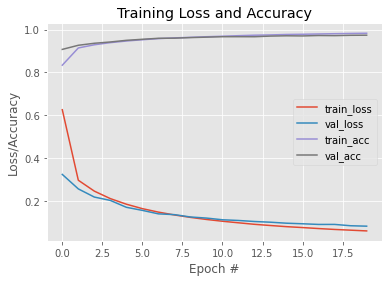

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()